In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load images
bg_img = cv2.imread("../Images/blue-background.jpg", cv2.IMREAD_UNCHANGED)
img1 = cv2.imread("../Images/person1.jpg", cv2.IMREAD_UNCHANGED)
img2 = cv2.imread("../Images/person2.webp", cv2.IMREAD_UNCHANGED)
img3 = cv2.imread("../Images/person2.jpg", cv2.IMREAD_UNCHANGED)
img4 = cv2.imread("../Images/person4.jpg", cv2.IMREAD_UNCHANGED)
img5 = cv2.imread("../Images/person3.jpg", cv2.IMREAD_UNCHANGED)

In [4]:
# Resize background image
bg_img = cv2.resize(bg_img, (2500, 1800), None, cv2.INTER_LINEAR)

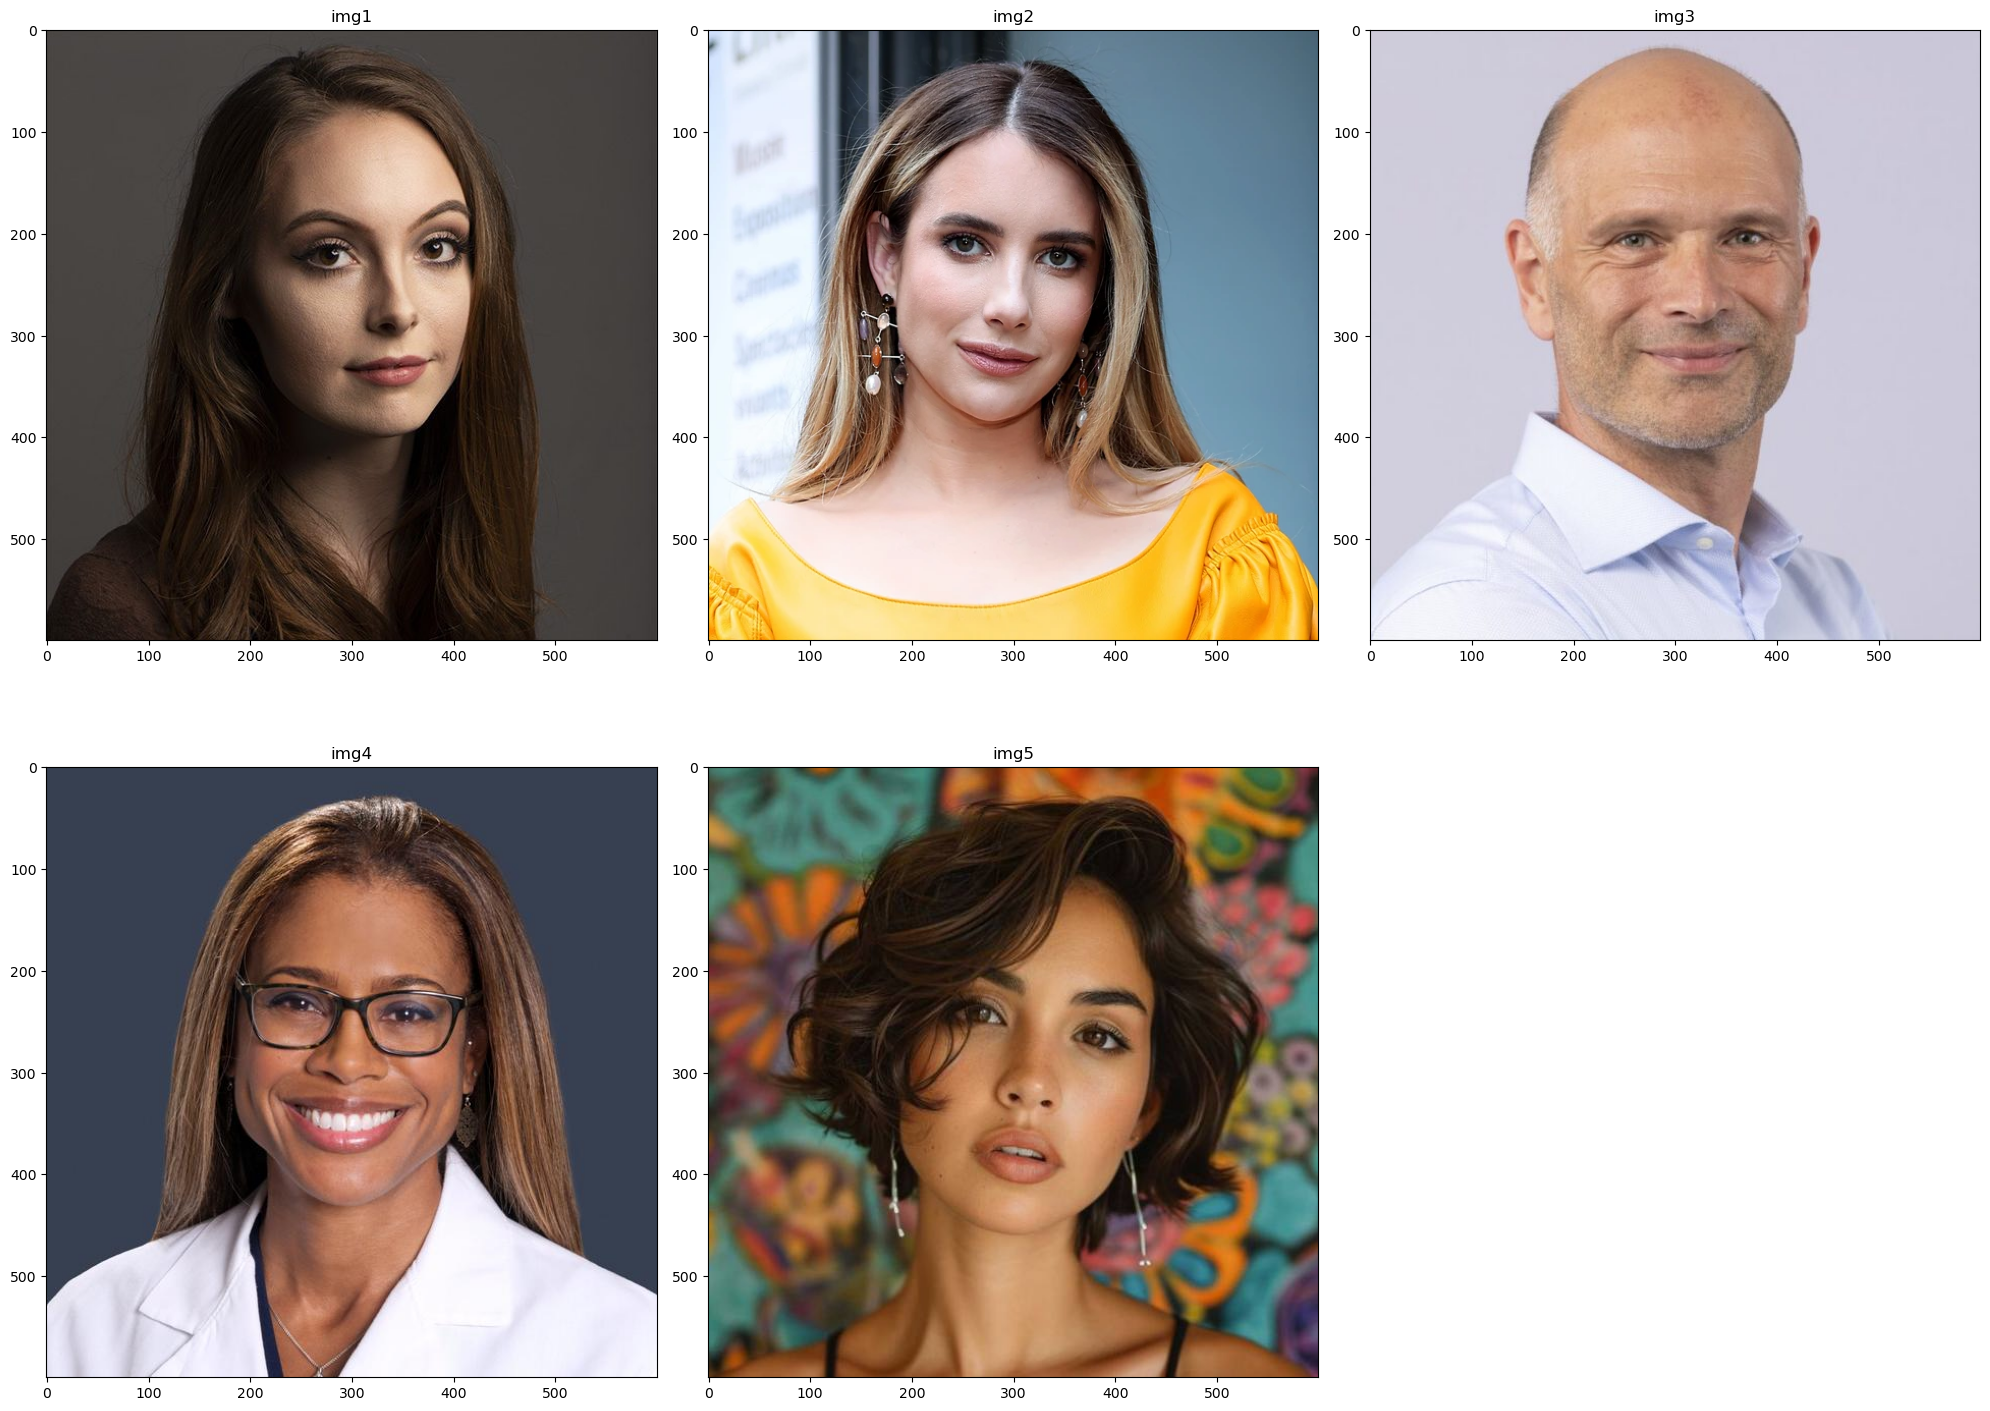

In [5]:
plt.figure(figsize=[20,15])
plt.subplot(231); plt.imshow(img1[:, :, ::-1]); plt.title('img1')
plt.subplot(232); plt.imshow(img2[:, :, ::-1]); plt.title('img2')
plt.subplot(233); plt.imshow(img3[:, :, ::-1]); plt.title('img3')
plt.subplot(234); plt.imshow(img4[:, :, ::-1]); plt.title('img4')
plt.subplot(235); plt.imshow(img5[:, :, ::-1]); plt.title('img5')

plt.tight_layout()

In [6]:
# Create masks
mask1 = np.zeros(img1.shape[:2], np.uint8)
mask2 = np.zeros(img2.shape[:2], np.uint8)
mask3 = np.zeros(img3.shape[:2], np.uint8)
mask4 = np.zeros(img4.shape[:2], np.uint8)
mask5 = np.zeros(img5.shape[:2], np.uint8)

In [7]:
# Define circle parameters
center = (300,230)
radius = 210
color = 255
thickness = -1

# Define circle parameters
cv2.circle(mask1, center, radius, color, thickness )
cv2.circle(mask2, center, radius, color, thickness )
cv2.circle(mask3, center, radius, color, thickness )
cv2.circle(mask4, center, radius, color, thickness )
cv2.circle(mask5, center, radius, color, thickness )

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# Apply masks to images
masked_img1 = cv2.bitwise_and(img1,img1, mask = mask1)
masked_img2 = cv2.bitwise_and(img2,img2, mask = mask2)
masked_img3 = cv2.bitwise_and(img3,img3, mask = mask3)
masked_img4 = cv2.bitwise_and(img4,img4, mask = mask4)
masked_img5 = cv2.bitwise_and(img5,img5, mask = mask5)

In [9]:
# plt.figure(figsize=[20,15])
# plt.subplot(231); plt.imshow(masked_img1[:,:,::-1]); plt.title('img1')
# plt.subplot(232); plt.imshow(masked_img2[:, :, ::-1]); plt.title('img2')
# plt.subplot(233); plt.imshow(masked_img3[:, :, ::-1]); plt.title('img3')
# plt.subplot(234); plt.imshow(masked_img4[:, :, ::-1]); plt.title('img4')
# plt.subplot(235); plt.imshow(masked_img5[:, :, ::-1]); plt.title('img5')

# plt.tight_layout()

In [10]:
# Create inverted masks
masked_img1_inv = cv2.bitwise_not(mask1)
masked_img2_inv = cv2.bitwise_not(mask2)
masked_img3_inv = cv2.bitwise_not(mask3)
masked_img4_inv = cv2.bitwise_not(mask4)
masked_img5_inv = cv2.bitwise_not(mask5)

In [11]:
# plt.figure(figsize=[20,15])
# plt.subplot(231); plt.imshow(masked_img1_inv, cmap = 'gray'); plt.title('img1')
# plt.subplot(232); plt.imshow(masked_img2_inv, cmap = 'gray'); plt.title('img2')
# plt.subplot(233); plt.imshow(masked_img3_inv, cmap = 'gray'); plt.title('img3')
# plt.subplot(234); plt.imshow(masked_img4_inv, cmap = 'gray'); plt.title('img4')
# plt.subplot(235); plt.imshow(masked_img5_inv, cmap = 'gray'); plt.title('img5')

# plt.tight_layout()

In [12]:
print(bg_img.shape)
# plt.imshow(bg_img[:, :, ::-1])

(1800, 2500, 3)


In [13]:
# Define offsets for each image
offset_tlx, offset_tly = 100, 100
offset_trx, offset_try = 1800, 100
offset_blx, offset_bly = 100 , 1200 
offset_brx, offset_bry =  1800, 1200
offset_cx = int(bg_img.shape[1] / 2 - img5.shape[1] / 2)
offset_cy = int(bg_img.shape[0] / 2 - img5.shape[0] / 2)
print((offset_cx, offset_cy))

(950, 600)


In [14]:
# Extract regions of interest
roi_bg_img1 = bg_img[offset_tly: offset_tly + img1.shape[0], offset_tlx: offset_tlx + img1.shape[1]]
roi_bg_img2 = bg_img[offset_try: offset_try + img1.shape[0], offset_trx: offset_trx + img1.shape[1]]
roi_bg_img3 = bg_img[offset_bly: offset_bly + img1.shape[0], offset_blx: offset_blx + img1.shape[1]]
roi_bg_img4 = bg_img[offset_bry: offset_bry + img1.shape[0], offset_brx: offset_brx + img1.shape[1]]
roi_bg_img5 = bg_img[offset_cy: offset_cy + img1.shape[0], offset_cx: offset_cx + img1.shape[1]]

print(roi_bg_img5.shape)
print(img1.shape)

(600, 600, 3)
(600, 600, 3)


In [15]:
# plt.figure(figsize=[20,15])
# plt.subplot(231); plt.imshow(roi_bg_img1[:,:,::-1]); plt.title('img1')
# plt.subplot(232); plt.imshow(roi_bg_img2[:, :, ::-1]); plt.title('img2')
# plt.subplot(233); plt.imshow(roi_bg_img3[:, :, ::-1]); plt.title('img3')
# plt.subplot(234); plt.imshow(roi_bg_img4[:, :, ::-1]); plt.title('img4')
# plt.subplot(235); plt.imshow(roi_bg_img5[:, :, ::-1]); plt.title('img5')

# plt.tight_layout()

In [16]:
# Apply masks to the regions
roi_masked_img1 = cv2.bitwise_and(roi_bg_img1,roi_bg_img1, mask = masked_img1_inv)
roi_masked_img2 = cv2.bitwise_and(roi_bg_img2,roi_bg_img2, mask = masked_img2_inv)
roi_masked_img3 = cv2.bitwise_and(roi_bg_img3,roi_bg_img3, mask = masked_img3_inv)
roi_masked_img4 = cv2.bitwise_and(roi_bg_img4,roi_bg_img4, mask = masked_img4_inv)
roi_masked_img5 = cv2.bitwise_and(roi_bg_img5,roi_bg_img5, mask = masked_img5_inv)

In [17]:
# plt.figure(figsize=[20,15])
# plt.subplot(231); plt.imshow(roi_masked_img1[:,:,::-1]); plt.title('img1')
# plt.subplot(232); plt.imshow(roi_masked_img2[:, :, ::-1]); plt.title('img2')
# plt.subplot(233); plt.imshow(roi_masked_img3[:, :, ::-1]); plt.title('img3')
# plt.subplot(234); plt.imshow(roi_masked_img4[:, :, ::-1]); plt.title('img4')
# plt.subplot(235); plt.imshow(roi_masked_img5[:, :, ::-1]); plt.title('img5')

# plt.tight_layout()

In [18]:
# Combine images with their masks
combined_roi_img1 = cv2.add(roi_masked_img1,masked_img1)
combined_roi_img2 = cv2.add(roi_masked_img2,masked_img2)
combined_roi_img3 = cv2.add(roi_masked_img3,masked_img3)
combined_roi_img4 = cv2.add(roi_masked_img4,masked_img4)
combined_roi_img5 = cv2.add(roi_masked_img5,masked_img5)

In [19]:
# plt.figure(figsize=[20,15])
# combined_roi_img1[:,:,::-1]); plt.title('img1')
# combined_roi_img2[:, :, ::-1]); plt.title('img2')
# combined_roi_img3[:, :, ::-1]); plt.title('img3')
# combined_roi_img4[:, :, ::-1]); plt.title('img4')
# combined_roi_img5[:, :, ::-1]); plt.title('img5')

# plt.tight_layout()plt.subplot(235); plt.imshow(plt.subplot(234); plt.imshow(plt.subplot(233); plt.imshow(plt.subplot(232); plt.imshow(plt.subplot(231); plt.imshow(

In [20]:
# Place images back into the background
bg_img[offset_tly: offset_tly + img1.shape[0], offset_tlx: offset_tlx + img1.shape[0]] = combined_roi_img1
bg_img[offset_try: offset_try + img1.shape[0], offset_trx: offset_trx + img1.shape[0]] = combined_roi_img2
bg_img[offset_bly: offset_bly + img1.shape[0], offset_blx: offset_blx + img1.shape[0]] = combined_roi_img3
bg_img[offset_bry: offset_bry + img1.shape[0], offset_brx: offset_brx + img1.shape[0]] = combined_roi_img4
bg_img[offset_cy: offset_cy + img1.shape[0], offset_cx: offset_cx + img1.shape[1]] = combined_roi_img5

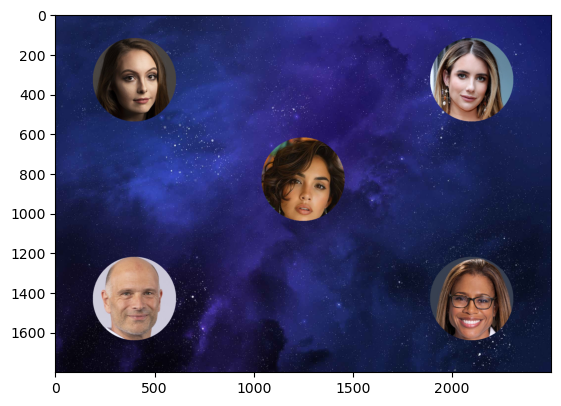

In [21]:
plt.imshow(bg_img[:, :, ::-1])